In [16]:
""" install_dependancies():
!pip3 install icecream plotly ipywidgets jupyter-dash isort black
"""
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.style.use("ggplot")
import datetime
import glob
import os
import re

import arrow
import matplotlib as mpl
import numpy as np
import plotly.express as px
from icecream import ic
from IPython.display import HTML
from ipywidgets import interact
from matplotlib import animation, rc

In [10]:
#############################################################################
# Prepare data and import into a dataframe
#############################################################################


def from_file(fp):
    inSection = False
    week = {}
    for l in fp.readlines():
        l = l.strip()  # Clear trailing spaces
        find_weeks = re.findall("\d\d\d\d-\d\d-\d\d", l)
        isWeekLine = len(find_weeks) == 1
        if isWeekLine:
            week["date"] = datetime.date.fromisoformat(find_weeks[0])
            continue
        isCategory = len(re.findall("##.*(/5)", l)) != 0
        if not isCategory:
            continue

        l = l[3:]  # strip the ##
        # Example line
        # blah blah (X/5)
        category = l.split(" (")[0]
        score = l.split(" (")[1][0]
        if not score.isdigit():
            # implies score isn't filled in
            continue

        week[category] = int(score)

    return week


valid_week_glob = os.path.expanduser("~/gits/igor2/week_report/*2022*md")


def df_for_weeks():
    weeks = [from_file(open(f)) for f in glob.glob(valid_week_glob)]
    df = pd.DataFrame(weeks)
    df.date = pd.to_datetime(df.date)
    return df


df = df_for_weeks()
df.sort_values("date")

,date,Work,Relationships,Identity Health,Cognitive Health,Emotional Health,Physical Health,House and goods,Mental quicksand
2,2022-01-01,5.0,4.0,5.0,NaN,5.0,3.0,5.0,5.0
8,2022-01-03,5.0,4.0,5.0,NaN,5.0,5.0,5.0,4.0
0,2022-01-10,5.0,5.0,5.0,5.0,3.0,5.0,5.0,3.0
7,2022-01-17,5.0,4.0,5.0,5.0,3.0,4.0,5.0,3.0
1,2022-01-24,4.0,4.0,5.0,5.0,3.0,5.0,5.0,1.0
3,2022-01-31,5.0,3.0,4.0,5.0,3.0,4.0,4.0,4.0
6,2022-02-07,4.0,3.0,5.0,5.0,3.0,3.0,4.0,3.0
4,2022-02-14,5.0,4.0,5.0,5.0,4.0,3.0,5.0,4.0
5,2022-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Seeing Roles charted

In [11]:
df1 = df.set_index("date")

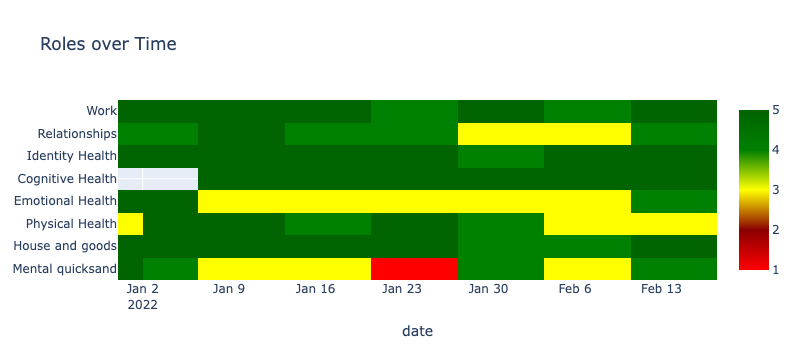

In [12]:
color_scale = [
    "red",
    "darkred",
    "yellow",
    "green",
    "darkgreen",
]
fig = px.imshow(
    df1.sort_values("date").T.iloc[:, :-1],
    color_continuous_scale=color_scale,
    title="Roles over Time",
    aspect="equal",
)
fig.show()

In [13]:
# !pip3 install isort black